# Fair game

## All about solving probability tasks, bringing justice to to the world and finding gold in the unlikely places.



<img src='golden.jpg'></img>

## Part I - The original case

The inspiration for this page has been an unfinished problem taken from the test on probability.

**Olga and Darek play a game containing one green marble and two red marbles. Each player in turn randomly selects a marble from the bag, notes its colour and replaces it. Olga wins the game if she selects a green marble. Darek wins the game if he selects a red marble. Olga starts the game.**

**Find the probability that**
- _Olga wins on her first turn_
- _Darek wins on his first turn_
- _Olga wins in one of her first three turns_
- _Olga eventually wins_


The first two questions are easy. The probabilities are:
\begin{equation*}
P\left(O\right)=\frac{1}{3}
\end{equation*}

\begin{equation*}
P\left(D\right)=\frac{4}{9}
\end{equation*}

The tricky part starts with question number 3. Apparently the correct answer is that Ola can win in first turn (probability = 1/3), second turn (probability = 1/3 * 2/9, because first turn has to be a draw) or third turn (probability = 1/3 * 2/9 * 2/9, first two turns result in a draw). 
The summary probability is:

\begin{equation*}
P\left(O3\right)=\frac{1}{3}+\frac{2}{27}+\frac{4}{243}=\frac{103}{243}
\end{equation*}

How can we verify the result? 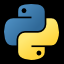 Python to the rescue! Below is a simple script that simulates a number of games and counts the events.

In [1]:
from random import randint


def game(r, b, n): # number of red marbles, green marbles, number of games
    w = [0, 0]
    for i in range(n):
        draw = True
        round = 0
        while draw and round<3:  # playing up to 3 rounds
            round+=1
            p = randint(1, r + b)
            if p <= r:
                w[0] += 1
                draw = False
            else:
                p = randint(1, r + b)
                if p > r:
                    w[1] += 1
                    draw = False
    return w  # [wins by Ola, wins by Darek]

n = 1000000
res = game(1, 2, n)
print('The probability of Olga winning in three rounds is {}'.format(res[0]/n))

The probability of Olga winning in three rounds is 0.424078


The result above confirms our thinking with pretty good accuracy.

Having the probability for the win in three rounds we can easily extend the results to infinity in order to answer the last question. The probability that Olga eventually wins is:

\begin{equation*}
P\left(OI\right)=\frac{1}{3}\sum_{i=0}^{\infty}{{(\frac{2}{9})}^i=\frac{1}{3}\frac{1}{1-\frac{2}{9}}=\frac{3}{7}}
\end{equation*}


This result can be confirmed by a script as well:

In [2]:
from random import randint


def game(r, b, n): # number of red marbles, green marbles, number of games
    w = [0, 0]
    for i in range(n):
        draw = True
        round = 0
        while draw:
            round+=1
            p = randint(1, r + b)
            if p <= r:
                w[0] += 1
                draw = False
            else:
                p = randint(1, r + b)
                if p > r:
                    w[1] += 1
                    draw = False
    return w  # [wins by Ola, wins by Darek]

n = 1000000
res = game(1, 2, n)
print('The probability of Olga eventually winning is {}'.format(res[0]/n))

The probability of Olga eventually winning is 0.428484


And that's the end of the original problem.

## Part II - fight for justice

All is well and good, but one can't help but notice that poor Olga has clearly less chance to win than her partner. In the era of growing conscience about the equal treatment we simply cannot let the rules of the game unfairly favourise one player.
Hence the question arises - how do we even out the chances in this game?

Yet again we use a simulation to find the number of marbles required to make the game fair. The script below is looking for a number of red marbles in proportion to green ones and tries to even out the probabilities for both players. Since we know how to calculate the probabilities, we don't need to simulate the game anymore, instead we count the probability of eventual win directly.
The algorithm is looking at the odds and depending on the result is adding either a red or a green marble.

In [3]:
from math import sqrt

def fair(n):
    bl = [1, 2]
    t = 0
    for i in range(n):
        t = game_precise(bl[0], bl[1], n)
        bl[t.index(min(t))] += 1
    return bl[0]/bl[1]


def game_precise(a,b,n):
    pa=a/(a+b)
    pb=(b/(a+b))**2
    pr=1-pa-pb
    eva=pa/(1-pr)
    return [int(eva*n), n-int(eva*n)]

r = fair(10000000)
print(r)

0.6180341829035


Due to its linear complexity the algorithm is reaching its limits at around 10 million marbles.

The bisection algorithm allows to get more precise result.

In [6]:
def fair_bin(n):
    bl=[1,n]
    t=0
    b=bl[0]
    e=bl[1]
    while b<e:
        m=(b+e)//2
        bl[0]=m
        t=game_precise(bl[0],bl[1],n)
        if t[0]<t[1]:  
            b=m+1
        else:
            e=m-1

    return bl[0]/bl[1]

r = fair_bin(10000000000)
print(r)

0.6180339888


%matplotlib inline

<AxesSubplot:xlabel='marbles', ylabel='approximation'>

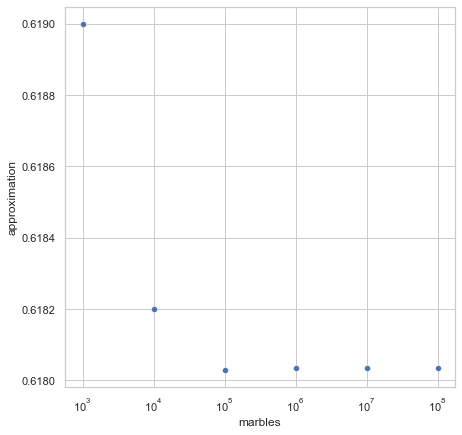

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid")
x = 10 ** np.arange(3, 9)
y = np.array([fair_bin(a) for a in x])
data = pd.DataFrame(data={'marbles': x, 'approximation': y})

f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="linear")
sns.scatterplot(x="marbles", y="approximation", data=data)

The results get more exact, but it looks like the proportion of red to green marbles giving the fair result is not a quotient number.


In order to verify this hypothesis let's try to calculate the ratio using the formulas.

We have the following probabilities for a single round:

\begin{equation*}
P\left(O\right)=\frac{r}{r+g}
\end{equation*}

\begin{equation*}
P\left(D\right)=\left(\frac{g}{r+g}\right)^2
\end{equation*}

\begin{equation*}
P\left(R\right)=1-P\left(O\right)-P\left(D\right)
\end{equation*}


The probability of Olga eventually winning can be described as:

\begin{equation*}
P\left(OI\right)=\frac{P(O)}{1-P(R)}=\frac{r(r+g)}{r^2+{rg+g}^2}
\end{equation*}

To even out the odds we would like this prbability to be 0.5, this leads us to the equation:

\begin{equation*}
\frac{r(r+g)}{r^2+rg+g^2}=0.5
\end{equation*}

Solving for g we get:

\begin{equation*}
g^2-rg\ +\ r^2=0
\end{equation*}

\begin{equation*}
∆ =5r^2
\end{equation*}

\begin{equation*}
g=\frac{(1\pm\sqrt5)r}{2}
\end{equation*}

Since r has to be positive, we finally arrive at:
\begin{equation*}
\frac{g}{r}=\frac{\sqrt5+1}{2}
\end{equation*}

# Neat, we found a golden ratio among the marbles :)

https://en.wikipedia.org/wiki/Golden_ratio

<img src='phi.svg'></img>

<img src='Golden_ratio_line.svg'></img>

<img src='Golden_ratio_line.svg'></img>

<img src='Golden_ratio_line.svg'></img>